In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [10]:
import math

big_hog = np.arange(9*9).reshape(9,9)
print('Hog is:', big_hog)

pixels = big_hog.ravel()

smaller = big_hog.reshape(-1,3,3).transpose(1,2, 0)
print('Smaller:', smaller.shape, smaller)
#x.reshape(2,2,5).transpose(1,0,2)

Hog is: [[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52 53]
 [54 55 56 57 58 59 60 61 62]
 [63 64 65 66 67 68 69 70 71]
 [72 73 74 75 76 77 78 79 80]]
Smaller: (3, 3, 9) [[[ 0  9 18 27 36 45 54 63 72]
  [ 1 10 19 28 37 46 55 64 73]
  [ 2 11 20 29 38 47 56 65 74]]

 [[ 3 12 21 30 39 48 57 66 75]
  [ 4 13 22 31 40 49 58 67 76]
  [ 5 14 23 32 41 50 59 68 77]]

 [[ 6 15 24 33 42 51 60 69 78]
  [ 7 16 25 34 43 52 61 70 79]
  [ 8 17 26 35 44 53 62 71 80]]]


In [14]:
# reference: https://stackoverflow.com/questions/16856788/slice-2d-array-into-smaller-2d-arrays

def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

big_hog = np.arange(9*9).reshape(9,9)
print('Hog is:', big_hog)

smaller = blockshaped(big_hog, 3, 3)
print('Smaller:', smaller.shape, smaller)

Hog is: [[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52 53]
 [54 55 56 57 58 59 60 61 62]
 [63 64 65 66 67 68 69 70 71]
 [72 73 74 75 76 77 78 79 80]]
Smaller: (9, 3, 3) [[[ 0  1  2]
  [ 9 10 11]
  [18 19 20]]

 [[ 3  4  5]
  [12 13 14]
  [21 22 23]]

 [[ 6  7  8]
  [15 16 17]
  [24 25 26]]

 [[27 28 29]
  [36 37 38]
  [45 46 47]]

 [[30 31 32]
  [39 40 41]
  [48 49 50]]

 [[33 34 35]
  [42 43 44]
  [51 52 53]]

 [[54 55 56]
  [63 64 65]
  [72 73 74]]

 [[57 58 59]
  [66 67 68]
  [75 76 77]]

 [[60 61 62]
  [69 70 71]
  [78 79 80]]]


## Subsampling

In [54]:
def get_hog_dimensions(width, height, pix_per_cell = 16, cell_per_block = 2, orient = 12):
    n_cells_x = width // pix_per_cell
    n_cells_y = height // pix_per_cell
    n_blocks_x = n_cells_x - cell_per_block + 1
    n_blocks_y = n_cells_y - cell_per_block + 1
    return (n_blocks_y, n_blocks_x, cell_per_block, cell_per_block, orient)
    
print(params)
dim = get_hog_dimensions(64, 64, params['pix_per_cell'], params['cell_per_block'], params['orient'])
print(dim)
print(dim[0] * dim[1] * dim[2] * dim[3] * dim[4])

{'orient': 11, 'pix_per_cell': 16, 'spatial_size': (32, 32), 'hist_feat': True, 'hog_feat': True, 'spatial_feat': True, 'kernel': 'linear', 'C': 1, 'color_space': 'LUV', 'cell_per_block': 2, 'hog_channel': 'ALL', 'hist_bins': 32}
(3, 3, 2, 2, 11)
396


Calling compute features on all boxes invidually
Calling subsample


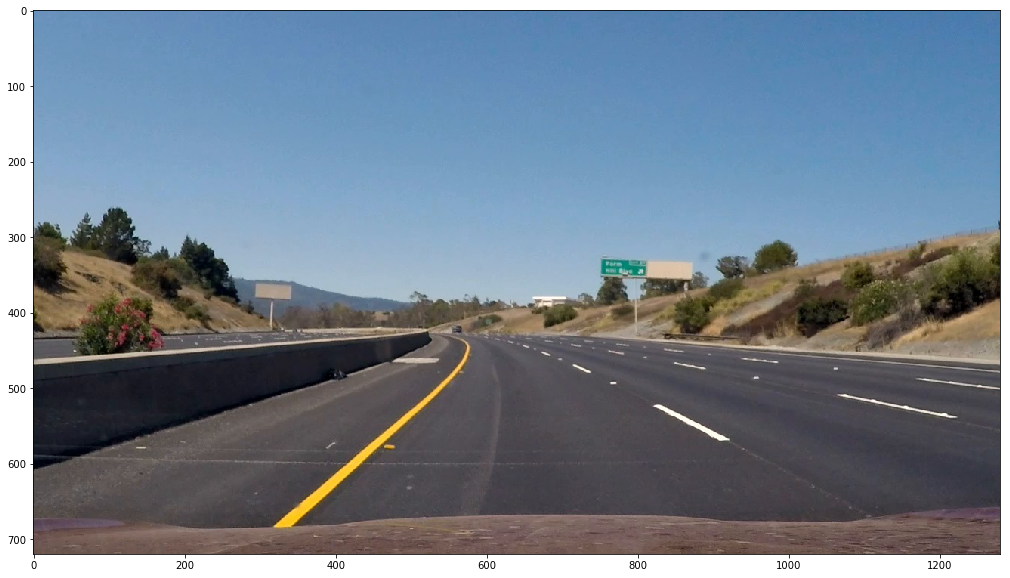

In [31]:
import math
from skimage.feature import hog

orient = 12
pix_per_cell = 16
cell_per_block = 2

img = cv2.imread('./project_video-frames/0000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

def block_from_pix(pix, n_blocks):
    cell_no = pix // pix_per_cell
    block_no = cell_no // cell_per_block
    
    if block_no > n_blocks:
        block_no = n_blocks - 1
    return block_no

def subsample(boxes):
    features_org = hog(lab[380:,:,0], orientations=orient, 
                            pixels_per_cell=(pix_per_cell, pix_per_cell),
                            cells_per_block=(cell_per_block, cell_per_block), 
                            transform_sqrt=True, 
                            visualise=False, 
                            feature_vector=False,
                            block_norm = 'L2-Hys')
    
    hog_64 = get_hog_dimensions(64,64,pix_per_cell,cell_per_block,orient)
    hog_length_64 = hog_64[0] * hog_64[1] * hog_64[2] * hog_64[3] * hog_64[4]

#     print('Original hog length:', hog_length_64)
    pix_per_block = cell_per_block * cell_per_block * pix_per_cell
#     print('Pixels per block:', pix_per_block)
    
    sub_hogs = []
    
    for box in boxes:
        pix = []
        
        sub_w = box[1][0] - box[0][0]
        sub_h = box[1][1] - box[0][1]

        sub_n_cells_x = sub_w // pix_per_cell
        sub_n_cells_y = sub_h // pix_per_cell
        sub_n_blocks_x = sub_n_cells_x - cell_per_block + 1
        sub_n_blocks_y = sub_n_cells_y - cell_per_block + 1
        
#         print('Box:', box)
#         print('Block Start Y:', y1)
#         print('Block Start X:', x1)
#         print('Block End y:', y2)
#         print('Block End x:', x2)
#         print('Box # of blocks_x:', sub_n_blocks_x)
#         print('Box # of blocks_y:', sub_n_blocks_y)
        
        start_block_x = block_from_pix(box[0][0], features_org.shape[1])
        start_block_y = block_from_pix(box[0][1] - 380, features_org.shape[0])
        end_block_x = start_block_x + sub_n_blocks_x 
        end_block_y = start_block_y + sub_n_blocks_x 
  
        sub_hog = features_org[start_block_y:end_block_y, start_block_x:end_block_x,:,:,:]
#         print(sub_hog.shape)
        
        pixels = sub_hog.ravel()
        cols = pixels.shape[0] / hog_length_64

#         print('Raveled sub hog: ', pixels.shape)
#         print('Number of new cols:', cols)
        
        if (pixels.shape[0] % hog_length_64) > 0:
#             print('Need to make data divisble by {}} so adding 0s'.format(hog_length_64))
            needed = hog_length_64 * math.ceil(pixels.shape[0] / hog_length_64)
            extra_required = needed - pixels.shape[0] 
            pixels = np.hstack((pixels, np.zeros(extra_required)))
#             print('after adding 0s, shape is', pixels.shape)

        cols = pixels.shape[0] // hog_length_64
        
        sub_pixels = pixels.reshape(-1, cols)
        box_hog = np.mean(sub_pixels, axis=1)
        
        sub_hogs.append(box_hog)
        
    return sub_hogs

#%timeit compute_features(boxes)
boxes = [((0,0), (10 * 16, 10 * 16))]

print('Calling compute features on all boxes invidually')
box_hogs1 = compute_features(boxes)
print('Calling subsample')
box_hogs2 = subsample(boxes)

# print(len(box_hogs1[0]))
# print(len(box_hogs2[0]))

#for box in boxes:
#    cv2.rectangle(img, box[0], box[1], (255, 0, 0), 4)

f, (ax1) = plt.subplots(1,1,figsize=(20,10))
ax1.imshow(img)
plt.show()



In [ ]:
#from pipeline_funcs import *

img = cv2.imread('./project_video-frames/0000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

boxes = get_all_boxes(lab)

box_hogs1 = compute_features(boxes)
box_hogs2 = subsample(boxes)

print(len(box_hogs1), len(box_hogs2))
print(box_hogs1[0].shape)

print('Calculating time for box  by box')
%timeit compute_features(boxes)

print('Calculating time for subsampling')
%timeit subsample(boxes)

In [41]:
import time
import cv2
from skimage.feature import hog
from boxes import *

img = load_image('./project_video-frames/0000.jpg', params['color_space'])

hog_channel = [0,1,2]
full_hog = []
boxes = get_all_boxes(img)

t1 = time.time()

for box in boxes:
    box_img = img_cs[box[0][1]:box[1][1], box[0][0]:box[1][0]]
    box_img_reduce = cv2.resize(box_img, (64,64))

    for channel in hog_channel:
        features = hog(box_img_reduce[:,:,channel], 
                       orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=False, 
                       feature_vector=True,
                       block_norm = 'L2-Hys')

        full_hog.append(features_channel)

t2 = time.time()
print('Total time taken for {} boxes to be reduced and hogged {:.2f} secs'.format(len(boxes), t2 - t1))

Total time taken for 124 boxes to be reduced and hogged 0.34 secs


## Load Parameters from Saved Data File

In [10]:
import time
import cv2
from skimage.feature import hog
import pickle
import threading
from lesson_functions import *

with open('svm.p', 'rb') as f:
    data = pickle.load(f)
    print(data)
    svc = data['svm']
    X_scaler = data['scaler']
    params = data['params']

img_cs = load_image('./project_video-frames/0000.jpg', params['color_space'])

{'svm': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'params': {'orient': 11, 'pix_per_cell': 16, 'spatial_size': (32, 32), 'hist_feat': True, 'hog_feat': True, 'spatial_feat': True, 'kernel': 'linear', 'C': 1, 'color_space': 'LUV', 'cell_per_block': 2, 'hog_channel': 'ALL', 'hist_bins': 32}}


## Hog For Complete Channels

In [52]:
from boxes import *

boxes = get_all_boxes(img_cs)

if params['hog_channel'] == 'ALL':
    channels = [0,1,2]
else:
    channels = [params['hog_channel']]
    
boxes_hog = []

t1 = time.time()

for box in boxes:
    box_img = img_cs[box[0][1]:box[1][1], box[0][0]:box[1][0]]
    box_img_64 = cv2.resize(box_img, (64,64))    

    box_features = []
    for channel in channels:
        features_channel = get_hog_features(
            box_img_64[:,:,channel], 
            orient = params['orient'], 
            pix_per_cell = params['pix_per_cell'], 
            cell_per_block = params['cell_per_block'],  
            vis=False, 
            feature_vec=False)
        box_features.append(features_channel)
    boxes_hog.append(np.concatenate(box_features))
    print(boxes_hog[0].shape)
    break
    

t2 = time.time()
print('Total time taken for {} boxes to be reduced and hogged {:.2f} secs'.format(len(boxes), t2 - t1))

(9, 3, 2, 2, 11)
Total time taken for 157 boxes to be reduced and hogged 0.00 secs


C:\Users\fahad\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


## Threaded Individual Box Hog

In [37]:
import time
import cv2
from skimage.feature import hog
from boxes import *

class CarDetector(threading.Thread):
    def __init__(self, img_cs, boxes):
        threading.Thread.__init__(self)
        self.boxes = boxes
        self.img_cs = np.copy(img_cs)
        self.box_hogs = []
        
    def run(self):
        for box in self.boxes:
            box_img = self.img_cs[box[0][1]:box[1][1], box[0][0]:box[1][0]]
            box_img_64 = cv2.resize(box_img, (64,64))    

            box_features = []
            for channel in channels:
                features_channel = get_hog_features(
                    box_img_64[:,:,channel], 
                    orient = params['orient'], 
                    pix_per_cell = params['pix_per_cell'], 
                    cell_per_block = params['cell_per_block'],  
                    vis=False, 
                    feature_vec=True)
                box_features.append(features_channel)

            self.box_hogs.append(np.concatenate(box_features))
                            
boxes = get_all_boxes(img_cs)
channels = [0,1,2] if params['hog_channel'] == 'ALL' else [params['hog_channel']]
boxes_hog = []

full_hog = []
threads = []

t1 = time.time()
per_thread = len(boxes) // 10

for i in range(0, len(boxes), per_thread):
    if i + per_thread < len(boxes):
        box_range = boxes[i:i + per_thread]
    else:
        box_range = boxes[i:]

    thread = CarDetector(img_cs, box_range)
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()
    full_hog.extend(thread.box_hogs)
    
t2 = time.time()
print('Total time taken for {} boxes to be reduced and hogged {:.2f} secs'.format(len(boxes), t2 - t1))

C:\Users\fahad\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Total time taken for 157 boxes to be reduced and hogged 0.21 secs


In [103]:
# import time
# import cv2
# from skimage.feature import hog
# import pickle
# import threading
# import math
# from boxes import *

# class Hogger(threading.Thread):
#     def __init__(self, img_cs, channel, boxes):
#         super().__init__()
#         self.channel = channel
#         self.img_cs = np.copy(img_cs[380:,:,self.channel])
#         self.hog_features = None
#         self.box_hogs = []
#         self.boxes = boxes

#     def run(self):
#         self.hog_features = get_hog_features(
#             self.img_cs, 
#             orient = params['orient'], 
#             pix_per_cell = params['pix_per_cell'], 
#             cell_per_block = params['cell_per_block'],  
#             vis=False, 
#             feature_vec=False)
#         self.subsample()
        
#     def block_from_pix(self, pix, n_blocks):
#         cell_no = pix // params['pix_per_cell']
#         block_no = cell_no // params['cell_per_block']

#         if block_no > n_blocks:
#             block_no = n_blocks - 1
#         return block_no
        
#     def subsample(self):
#         boxes = self.boxes
#         hog_64 = get_hog_dimensions(64,64,params['pix_per_cell'],params['cell_per_block'],params['orient'])
#         hog_length_64 = hog_64[0] * hog_64[1] * hog_64[2] * hog_64[3] * hog_64[4]

#         pix_per_block = params['cell_per_block'] ** 2 * params['pix_per_cell']
        
#         for box in boxes:
#             sub_w = box[1][0] - box[0][0]
#             sub_h = box[1][1] - box[0][1]

#             sub_n_cells_x = sub_w // params['pix_per_cell']
#             sub_n_cells_y = sub_h // params['pix_per_cell']
#             sub_n_blocks_x = sub_n_cells_x - params['cell_per_block'] + 1
#             sub_n_blocks_y = sub_n_cells_y - params['cell_per_block']  + 1

#             start_block_x = self.block_from_pix(box[0][0], self.hog_features.shape[1])
#             start_block_y = self.block_from_pix(box[0][1] - 380, self.hog_features.shape[0])
#             end_block_x = start_block_x + sub_n_blocks_x 
#             end_block_y = start_block_y + sub_n_blocks_x 

#             sub_hog = self.hog_features[start_block_y:end_block_y, start_block_x:end_block_x,:,:,:]
    
#             pixels = sub_hog.ravel()
#             cols = pixels.shape[0] / hog_length_64

#             if (pixels.shape[0] % hog_length_64) > 0:
#                 needed = hog_length_64 * math.ceil(pixels.shape[0] / hog_length_64)
#                 extra_required = needed - pixels.shape[0] 
#                 pixels = np.hstack((pixels, np.zeros(extra_required)))
    
#             cols = pixels.shape[0] // hog_length_64

#             sub_pixels = pixels.reshape(-1, cols)
#             box_hog = np.mean(sub_pixels, axis=1)
#             self.box_hogs.append(box_hog)

# full_hog = []
# boxes = get_all_boxes(img_cs)
# t1 = time.time()

# hoggers = []
# hog_channel = [0,1,2] if params['hog_channel'] == 'ALL' else [params[hog_channel]]

# for channel in hog_channel:
#     t = Hogger(img_cs, channel, boxes)
#     hoggers.append(t)
#     t.start()
    
# for hogger in hoggers:
#     hogger.join()
#     full_hog.append(hogger.hog_features)
    
# t2 = time.time()
# print('Time for hog on {} channels {:.2f} secs:'.format(hog_channel, t2 - t1))

Time for hog on [0, 1, 2] channels 0.14 secs:


C:\Users\fahad\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


## Using Udacity

found car
found car
found car
found car


C:\Users\fahad\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


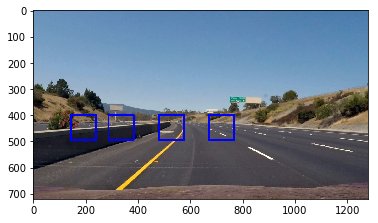

In [110]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from lesson_functions import *

%matplotlib inline

img = load_image('./project_video-frames/0000.jpg','RGB')

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    #img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    #print(nxsteps * nysteps)
    boxes = []
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            boxes.append(((ytop,ytop+window), (xleft,xleft+window)))
            
            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                print('found car')
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
            
            
    return draw_img, boxes
    
ystart = 400
ystop = 656
scale = 1.5
    
out_img, boxes = find_cars(img, ystart, ystop, scale, 
                    svc, 
                    X_scaler, 
                    params['orient'], 
                    params['pix_per_cell'], 
                    params['cell_per_block'], 
                    params['spatial_size'], 
                    params['hist_bins'])

# t1 = time.time()
# scale = 1
# out_img = find_cars(img, ystart, ystop, scale, 
#                     svc, 
#                     X_scaler, 
#                     params['orient'], 
#                     params['pix_per_cell'], 
#                     params['cell_per_block'], 
#                     params['spatial_size'], 
#                     params['hist_bins'])
# t2 = time.time()
# print('Time taken: {:.3f} secs'.format(t2-t1))
plt.imshow(out_img)